# COSC 3337 - Practice 9 - Support Vector Machine - Ujwal Joshi

### About The Data
We'll be using the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains a total of 32 columns, with following attribute information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Our goal will be to predict the diagnosis (benign or malignant).

### Exploratory Data Analysis
Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame.

In [3]:
breast_cancer_df = pd.read_csv('data.csv')
breast_cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
# Modified Work
breast_cancer_df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

There's an odd column "Unnamed: 32", which we'll go ahead and drop since it's full of NaN values. We also won't need the id label, so we can drop that as well.

In [5]:
breast_cancer_df.drop(labels=['Unnamed: 32', 'id'], axis=1, inplace=True)

Since a lot of the features in this dataset can be hard to interpret without domain knowledge of cancer or tumor cells, we'll just do a few visualizations here, but feel free to explore as much as you'd like before constructing a model.

In [6]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

calling `.info()` we see that there are no missing values in this dataset.

In [7]:
# Modified Work
breast_cancer_df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
# Modified Work
unique_vals_breast_cancer_df = pd.DataFrame({
    'Unique Value Count': breast_cancer_df.apply(lambda col: len(col.unique())),
    'Unique Values': breast_cancer_df.apply(lambda col: col.unique())
})

unique_vals_breast_cancer_df

Unique Value Count  \
diagnosis                                 2   
radius_mean                             456   
texture_mean                            479   
perimeter_mean                          522   
area_mean                               539   
smoothness_mean                         474   
compactness_mean                        537   
concavity_mean                          537   
concave points_mean                     542   
symmetry_mean                           432   
fractal_dimension_mean                  499   
radius_se                               540   
texture_se                              519   
perimeter_se                            533   
area_se                                 528   
smoothness_se                           547   
compactness_se                          541   
concavity_se                            533   
concave points_se                       507   
symmetry_se                             498   
fractal_dimension_se                    545   
radius_worst                            457   
texture_worst                           511   
perimeter_worst                         514   
area_worst                              544   
smoothness_worst                        411   
compactness_worst                       529   
concavity_worst                         539   
concave points_worst                    492   
symmetry_worst                          500   
fractal_dimension_worst                 535   

                                                             Unique Values  
diagnosis                                                           [M, B]  
radius_mean              [17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....  
texture_mean             [10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...  
perimeter_mean           [122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...  
area_mean                [1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...  
smoothness_mean          [0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12...  
compactness_mean         [0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17...  
concavity_mean           [0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...  
concave points_mean      [0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08...  
symmetry_mean            [0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.208...  
fractal_dimension_mean   [0.07871, 0.05667, 0.05999, 0.09744, 0.05883, ...  
radius_se                [1.095, 0.5435, 0.7456, 0.4956, 0.7572, 0.3345...  
texture_se               [0.9053, 0.7339, 0.7869, 1.156, 0.7813, 0.8902...  
perimeter_se             [8.589, 3.398, 4.585, 3.445, 5.438, 2.217, 3.1...  
area_se                  [153.4, 74.08, 94.03, 27.23, 94.44, 27.19, 53....  
smoothness_se            [0.006399, 0.005225, 0.00615, 0.00911, 0.01149...  
compactness_se           [0.04904, 0.01308, 0.04006, 0.07458, 0.02461, ...  
concavity_se             [0.05373, 0.0186, 0.03832, 0.05661, 0.05688, 0...  
concave points_se        [0.01587, 0.0134, 0.02058, 0.01867, 0.01885, 0...  
symmetry_se              [0.03003, 0.01389, 0.0225, 0.05963, 0.01756, 0...  
fractal_dimension_se     [0.006193, 0.003532, 0.004571, 0.009208, 0.005...  
radius_worst             [25.38, 24.99, 23.57, 14.91, 22.54, 15.47, 22....  
texture_worst            [17.33, 23.41, 25.53, 26.5, 16.67, 23.75, 27.6...  
perimeter_worst          [184.6, 158.8, 152.5, 98.87, 152.2, 103.4, 153...  
area_worst               [2019.0, 1956.0, 1709.0, 567.7, 1575.0, 741.6,...  
smoothness_worst         [0.1622, 0.1238, 0.1444, 0.2098, 0.1374, 0.179...  
compactness_worst        [0.6656, 0.1866, 0.4245, 0.8663, 0.205, 0.5249...  
concavity_worst          [0.7119, 0.2416, 0.4504, 0.6869, 0.4, 0.5355, ...  
concave points_worst     [0.2654, 0.186, 0.243, 0.2575, 0.1625, 0.1741,...  
symmetry_worst           [0.4601, 0.275, 0.3613, 0.6638, 0.2364, 0.3985...  
fractal_dimension_worst  [0.1189, 0.08902, 0.08758, 0.173, 0.07678, 0.1...

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


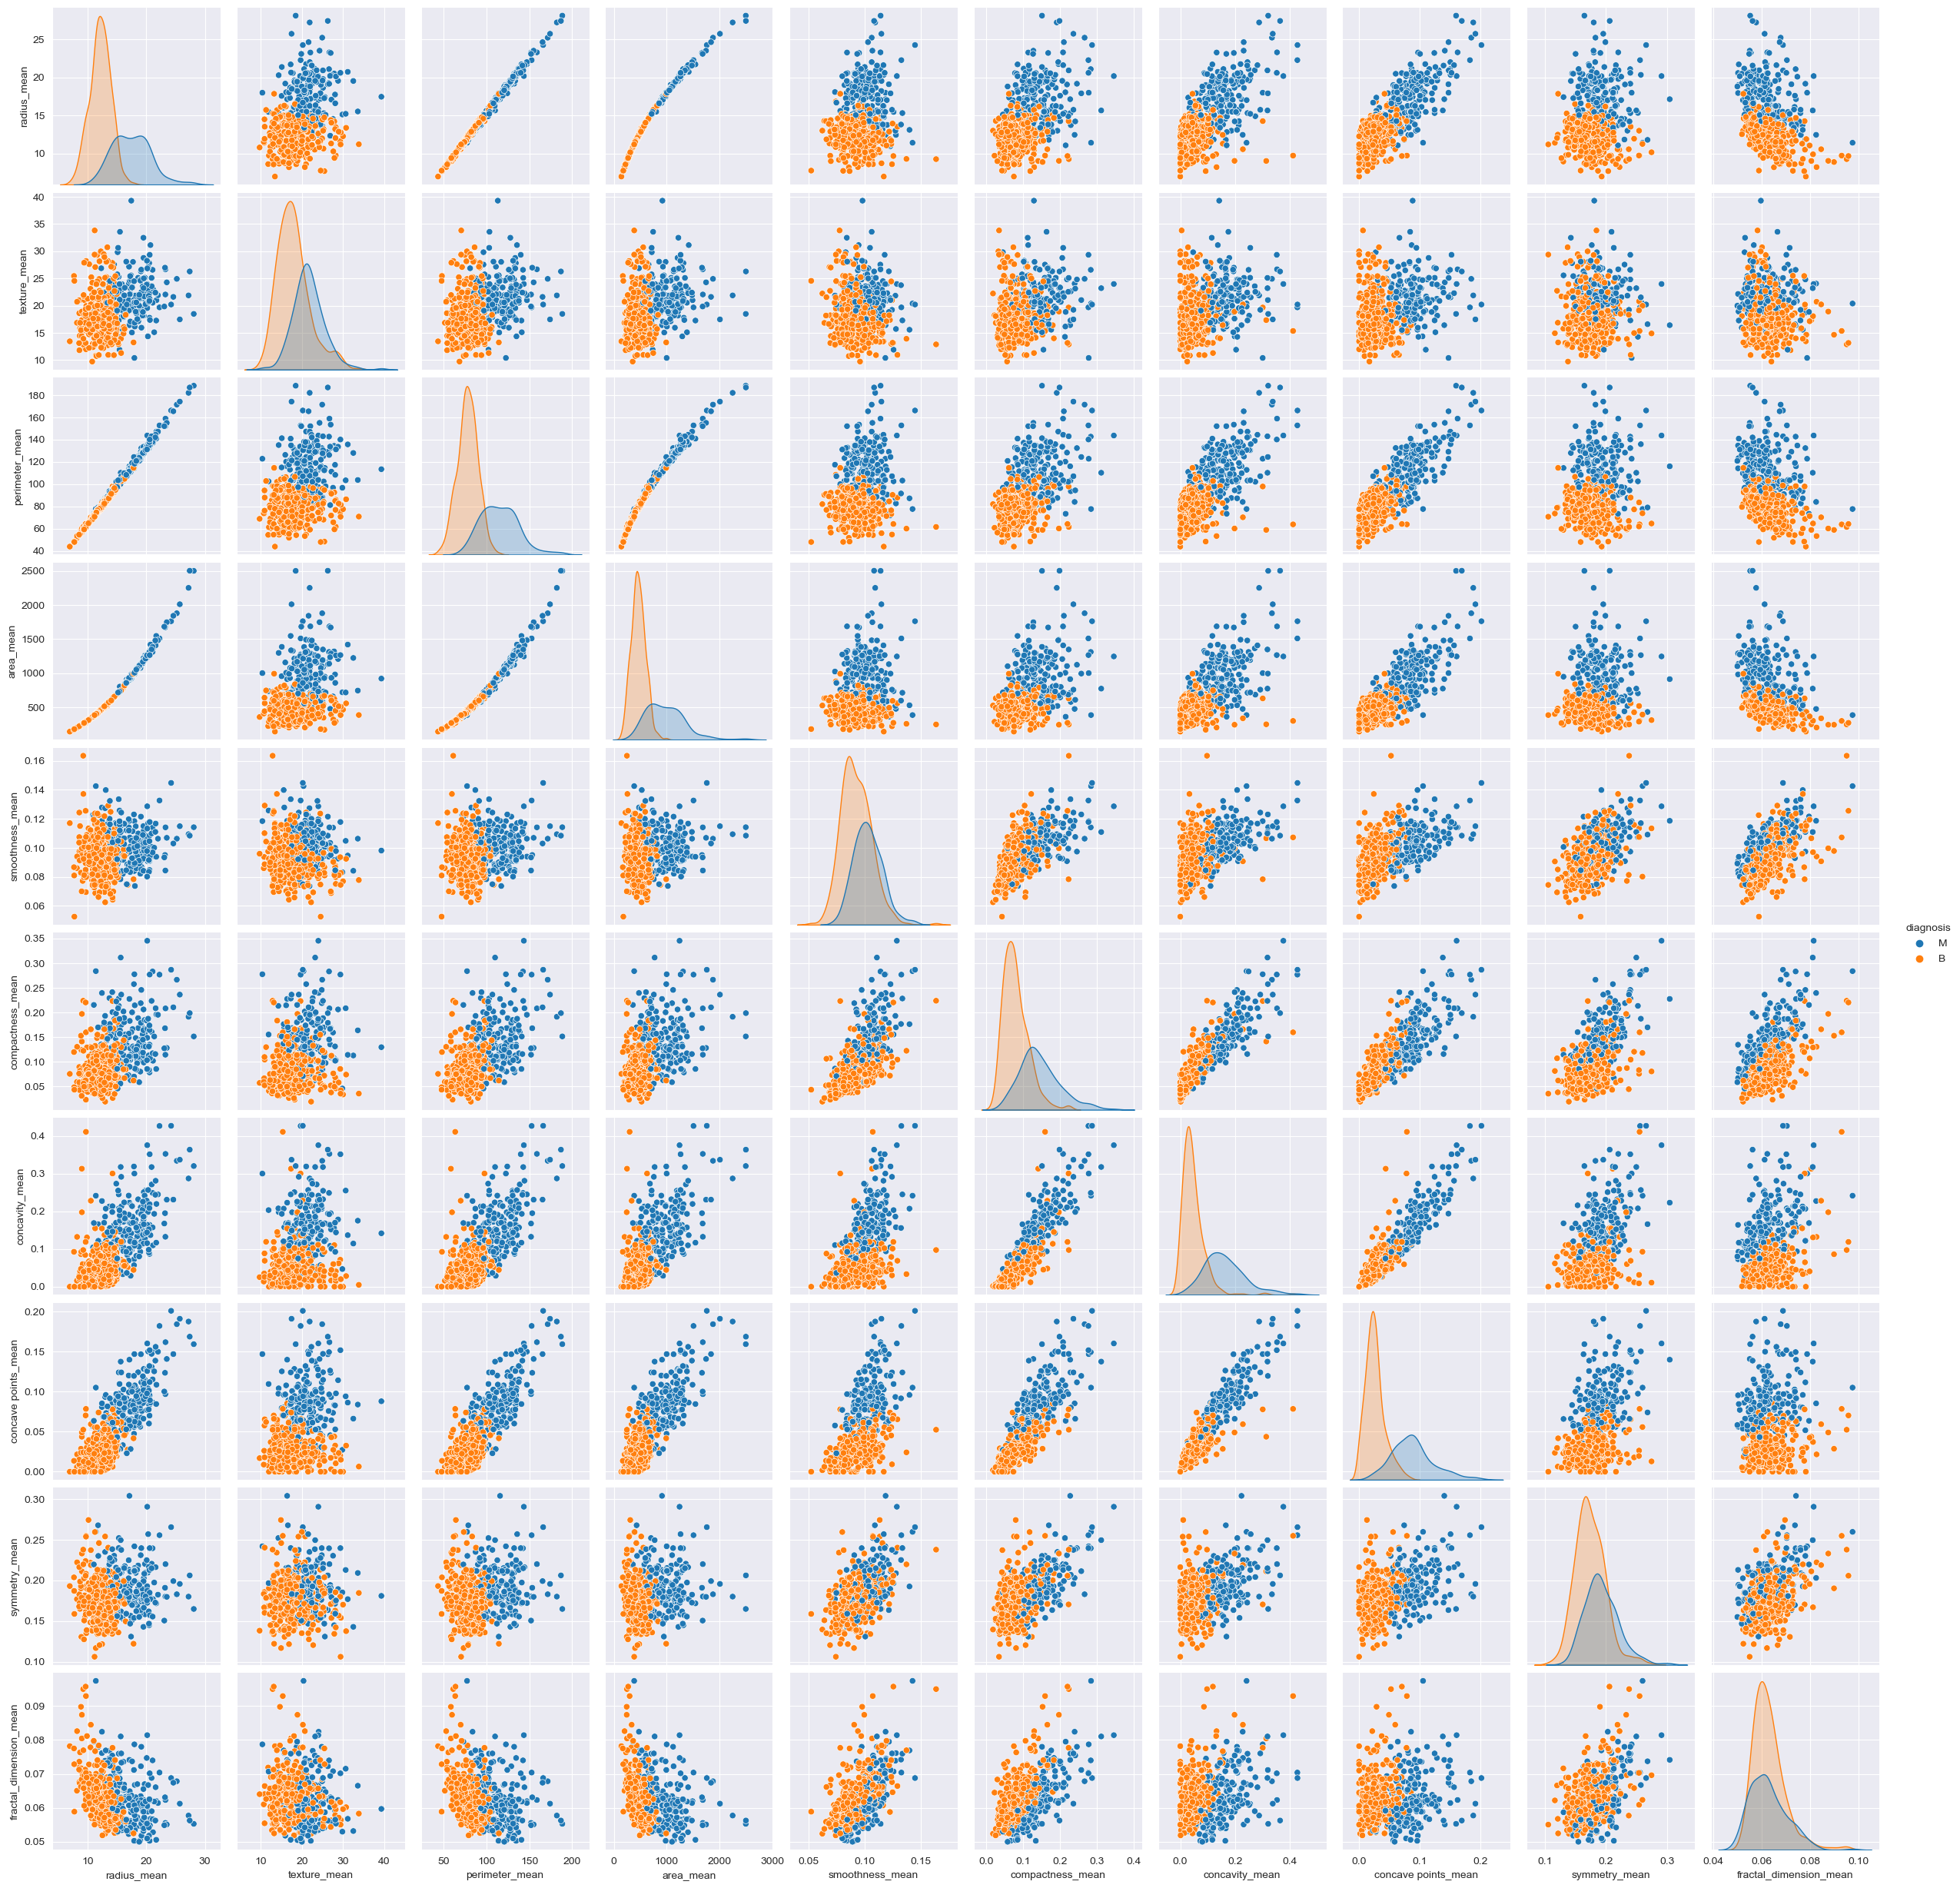

In [9]:
sns.pairplot(breast_cancer_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.show()

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


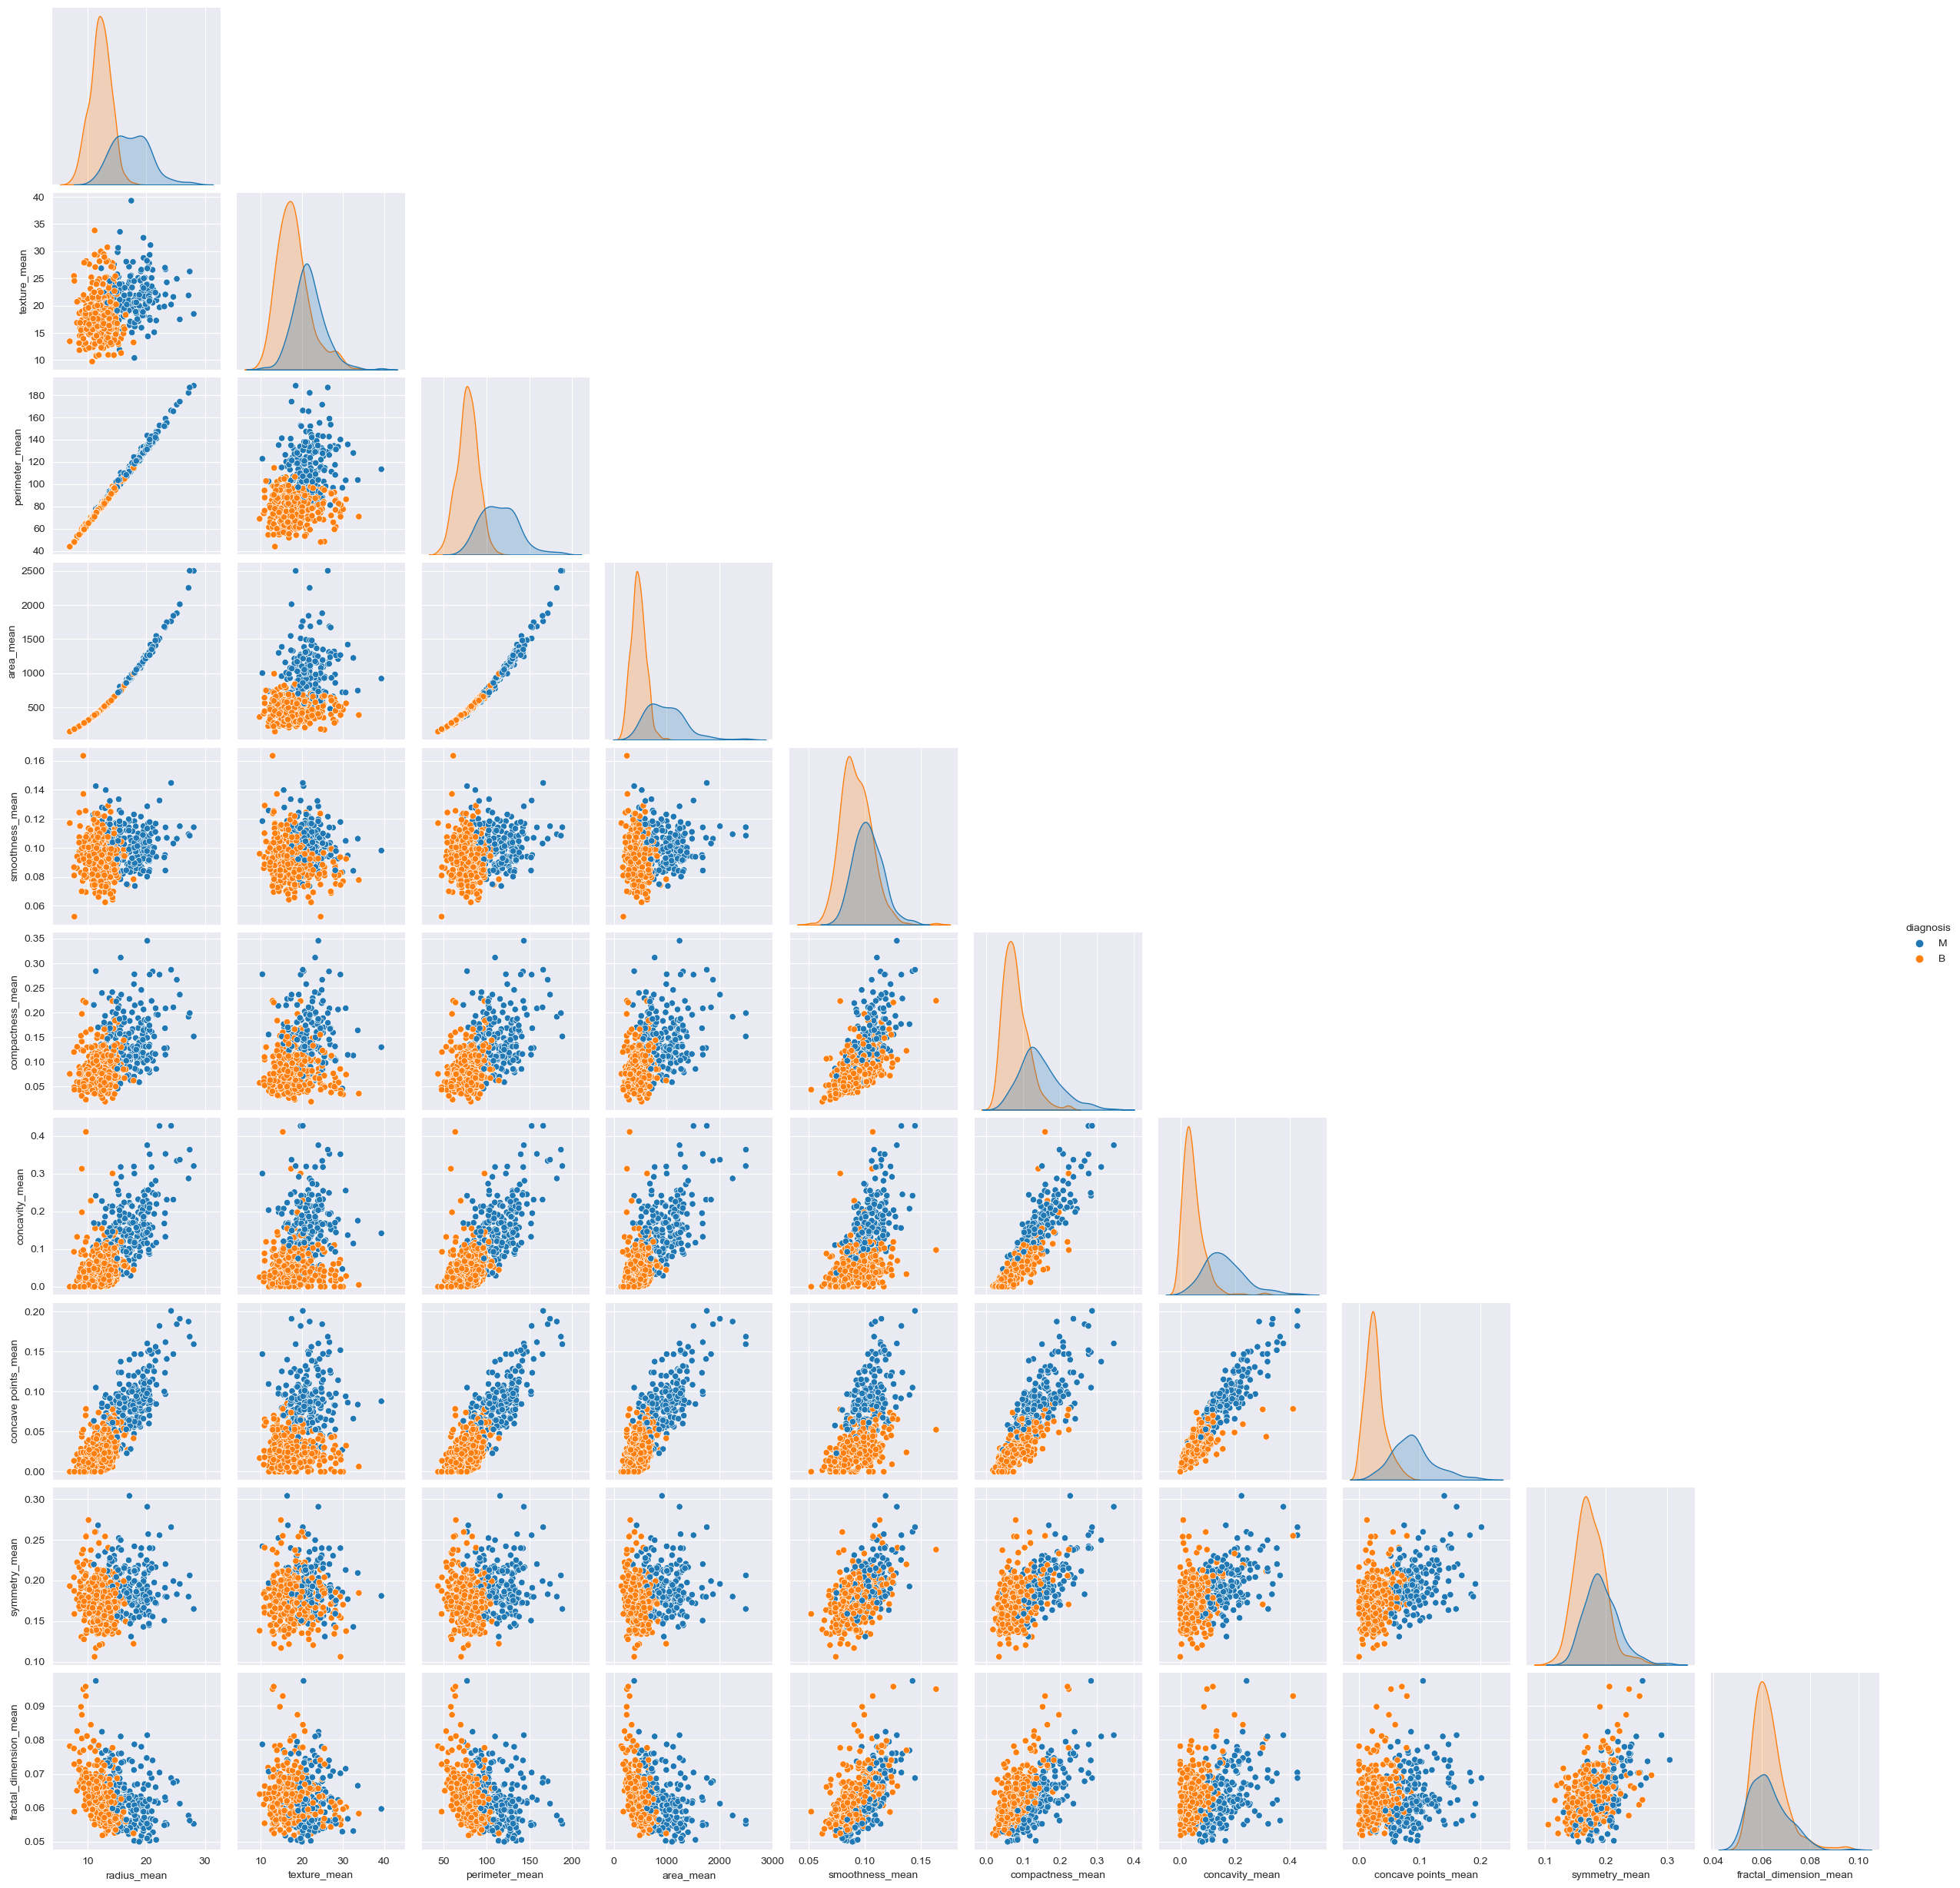

In [10]:
# Modified Work
sns.pairplot(breast_cancer_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], corner=True)
plt.show()

There seems to be pretty good distinction between the diagnosis (blue & orange) in most of the atributes above.

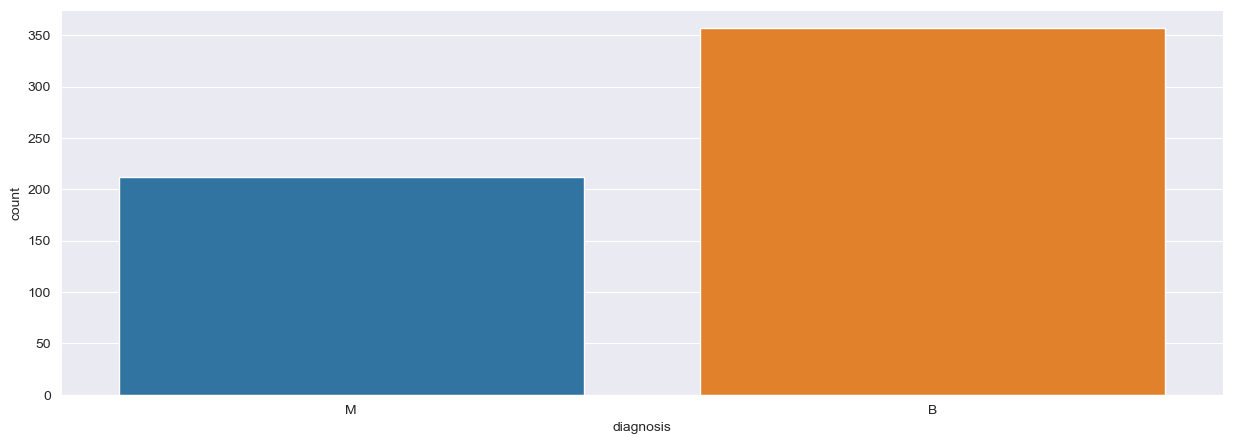

In [11]:
sns.countplot(x=breast_cancer_df['diagnosis'])
plt.show()

Majority of our data observations are of the benign class.

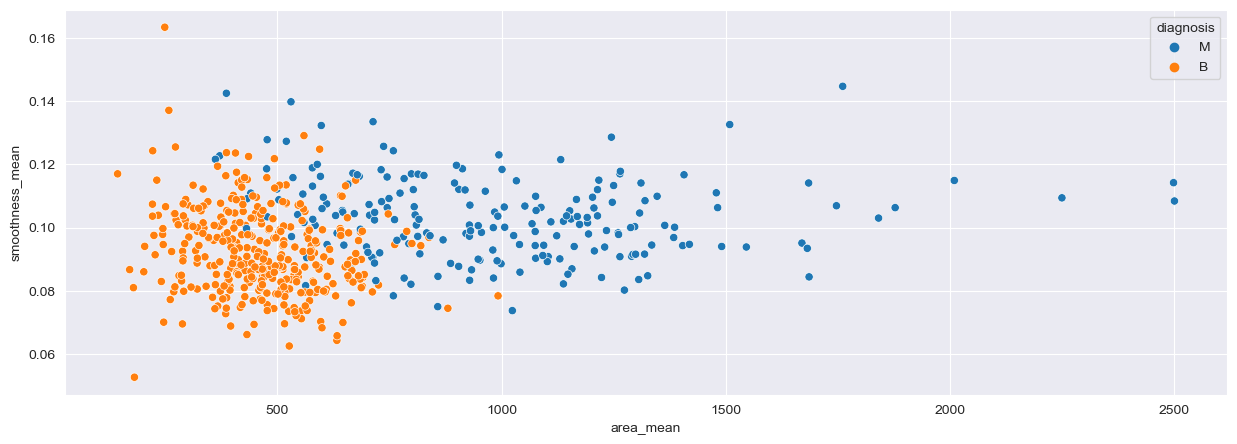

In [12]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = breast_cancer_df)
plt.show()

area_mean could be a good predictor wheather malignant or benign since there is pretty good separation here. Most benign (orange) have area_mean of around 500 or lower.

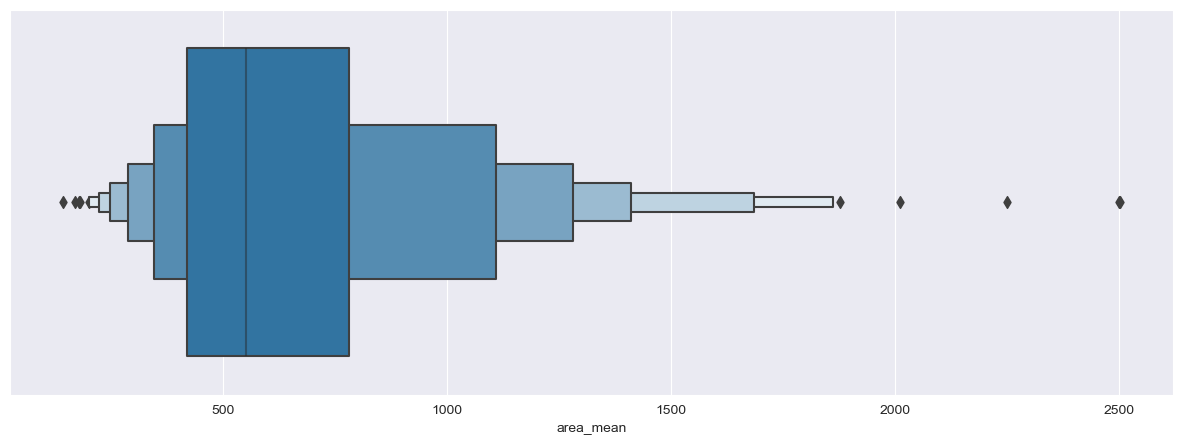

In [15]:
# Modified Work
sns.boxenplot(breast_cancer_df, x='area_mean')
plt.show()

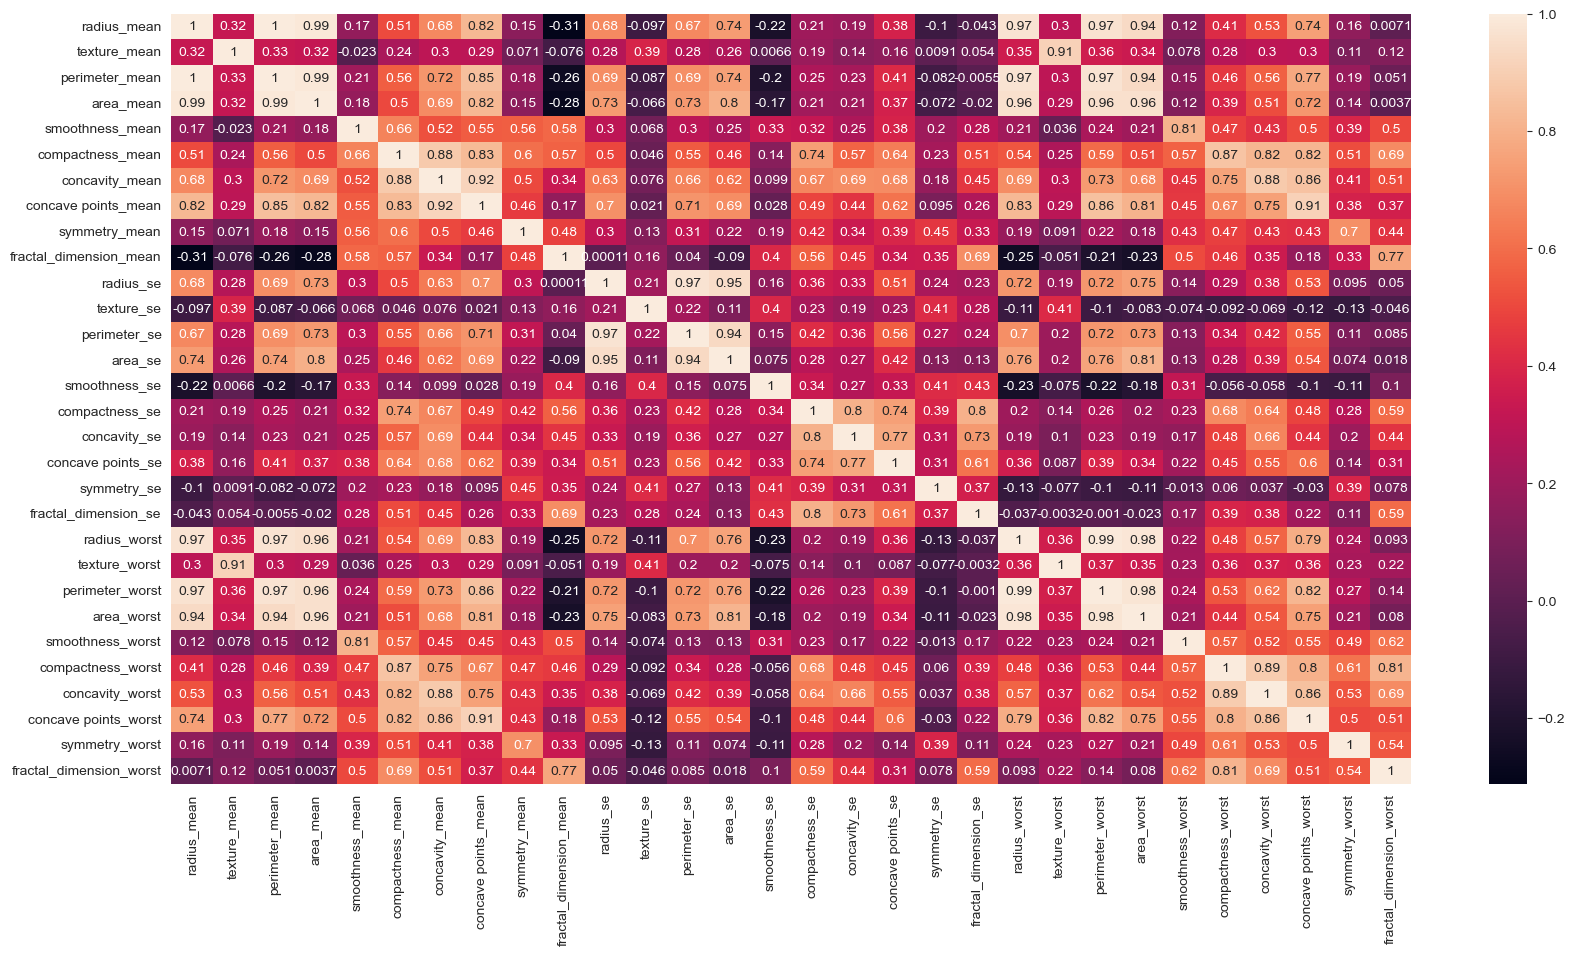

In [17]:
plt.figure(figsize=(20,10)) 
sns.heatmap(breast_cancer_df.drop(columns=['diagnosis']).corr(), annot=True) 
plt.show()

Some strong correlations are present. (very bright squares for example)

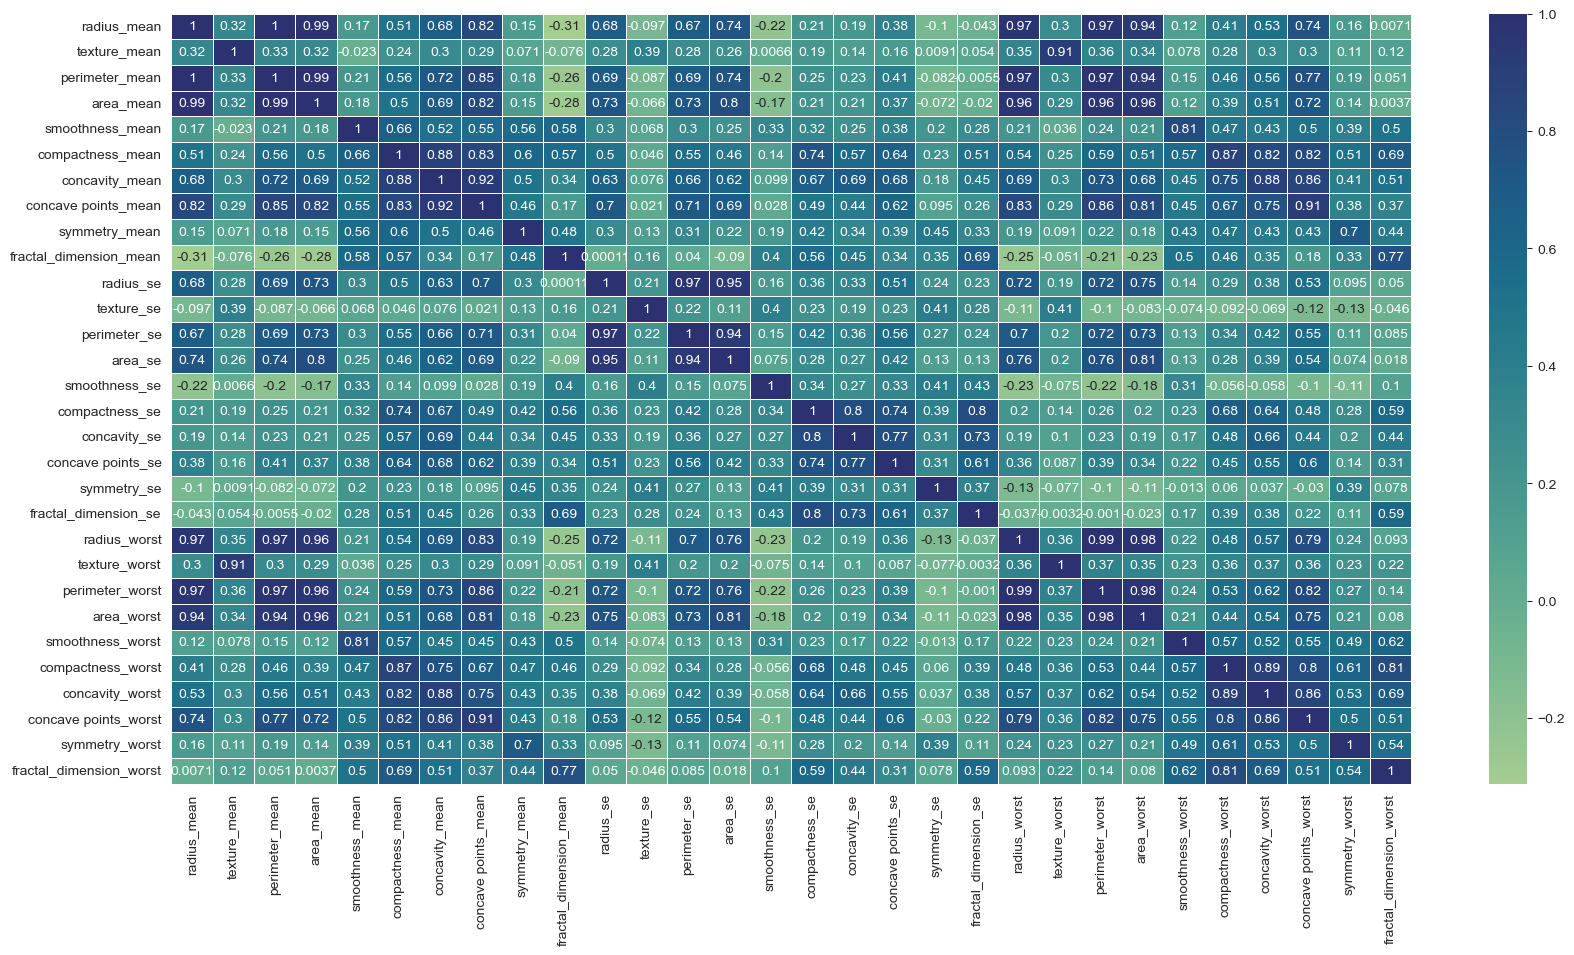

In [18]:
# Modified Work
plt.figure(figsize=(20,10)) 
sns.heatmap(breast_cancer_df.drop(columns=['diagnosis']).corr(), annot=True, linewidth=.5, cmap="crest") 
plt.show()

### Pre-Processing
Let's go ahead and scale our data before training and creating our model

In [19]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = breast_cancer_df.drop('diagnosis', axis=1)
y = breast_cancer_df['diagnosis']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [20]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [22]:
# Modified Work
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Creating our Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's `train_test_split(X, y, test_size)` function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# Modified Work
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
from sklearn.svm import SVC

# instantiate the model with default parameters
model = SVC()
# fit/train 
model.fit(X_train,y_train)

SVC()

In [26]:
# Modified Work
model2 = SVC()
model2.fit(X2_train, y2_train)

SVC()

### Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data.

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[104   1]
 [  3  63]]

True Positives(TP) =  104

True Negatives(TN) =  63

False Positives(FP) =  1

False Negatives(FN) =  3


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       105
           M       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [30]:
# Modified Work
predictions2 = model2.predict(X2_test)

cm2 = confusion_matrix(y2_test, predictions2)

print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0,0])
print('\nTrue Negatives(TN) = ', cm2[1,1])
print('\nFalse Positives(FP) = ', cm2[0,1])
print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[71  1]
 [ 1 41]]

True Positives(TP) =  71

True Negatives(TN) =  41

False Positives(FP) =  1

False Negatives(FN) =  1


In [31]:
print(classification_report(y2_test, predictions2))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Hyperparameter Tuning
Finding the right parameters (like what C or gamma values to use) is a tricky task, but luckily we can be a little lazy and just try a bunch of combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV. The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. Let's go ahead and try a few different parameters to see which of them is the best set to use.

In [32]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

You should add refit=True and choose verbose to whatever number you want. The higher the number, the more verbose.(verbose just means the text output describing the process).

In [33]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

What fit does is a bit more involved than usual. First, it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to build a single new model using the best parameter setting.

In [34]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV using the bestparams attribute, and the best estimator using the best_estimator_ attribute. Here we see that the best set of parameters from the ones we specified are 10 for c value, 0.01 for gamma, and 'rbf' for the kernel.

In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Then you can re-run predictions on this grid object just like you would with a normal model.

In [36]:
grid_predictions = grid.predict(X_test)

In [37]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[105   0]
 [  2  64]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       105
           M       1.00      0.97      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [43]:
# Modified Work
grid2 = GridSearchCV(SVC(), {'C': [0.1, 0.5, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear']}, refit=True, verbose=2)
grid2.fit(X2_train, y2_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [44]:
grid2.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [45]:
grid2_predictions = grid2.predict(X2_test)
print(confusion_matrix(y2_test, grid2_predictions))
print(classification_report(y2_test, grid2_predictions))

[[72  0]
 [ 1 41]]
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        72
           M       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Nice! We got a slightly better improvement using these parameters, though our original accuracy was already very good. Keep this grid search in mind when you need to do hyperparameter tuning. It can save you a lot of time.

Congrats! 🙂 You now know how to use SVM and hyperparameter tuning in sklearn. Try using this on your own dataset and refer back to this lecture if you get stuck.